### Term Deposit Sale

Goal:
Using the data collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio.

<b>Data Dictionary</b>:

Bank client data:
1. age: Continuous feature
2. job: Type of job (management, technician, entrepreneur, blue-collar, etc.)
3. marital: marital status (married, single, divorced)
4. education: education level (primary, secondary, tertiary)
5. default: has credit in default?
6. housing: has housing loan?
7. loan: has personal loan?
8. balance in account
Related to previous contact:
9. contact: contact communication type
10. month: last contact month of year
11. day: last contact day of the month
12. duration: last contact duration, in seconds*
Other attributes:
13. campaign: number of contacts performed during this campaign and for this client
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (-1 tells us the person has not been contacted or contact period is beyond 900 days)
15. previous: number of contacts performed before this campaign and for this client
16. poutcome: outcome of the previous marketing campaign
Output variable (desired target):
17. Target: Tell us has the client subscribed a term deposit. (Yes, No)

## Deliverable – 1 (Exploratory data quality report reflecting the following) – (20)

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

## Devlierable 1 - 1a. Univariate analysis – data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers.

In [2]:
pdata = pd.read_csv("bank-full.csv")

In [3]:
pdata.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [4]:
pdata.shape # Check number of columns and rows in data frame

(45211, 17)

In [5]:
pdata.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
pdata.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [7]:
pdata.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

In [8]:
pdata.isnull().sum()# If there are any null values in data set

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

no     88.30152
yes    11.69848
Name: Target, dtype: float64



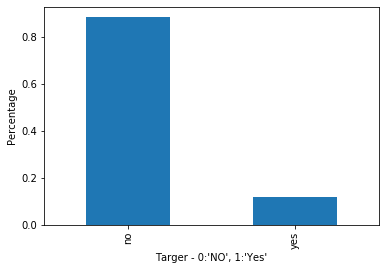

In [9]:
print(pdata['Target'].value_counts(normalize=True)*100)
print()
pdata['Target'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel("Targer - 0:'NO', 1:'Yes'")
plt.ylabel("Percentage")
plt.show()

1     38.804716
2     27.659198
3     12.211630
4      7.790140
5      3.901705
6      2.855500
7      1.625711
8      1.194400
9      0.723275
10     0.588352
11     0.444582
12     0.342837
13     0.294176
14     0.205702
15     0.185795
16     0.174736
17     0.152618
18     0.112804
19     0.097321
20     0.095110
21     0.077415
22     0.050873
23     0.048661
25     0.048661
24     0.044237
28     0.035390
29     0.035390
26     0.028754
31     0.026542
27     0.022119
32     0.019907
30     0.017695
33     0.013271
34     0.011059
36     0.008847
35     0.008847
43     0.006636
38     0.006636
41     0.004424
50     0.004424
37     0.004424
51     0.002212
55     0.002212
46     0.002212
58     0.002212
44     0.002212
39     0.002212
63     0.002212
Name: campaign, dtype: float64



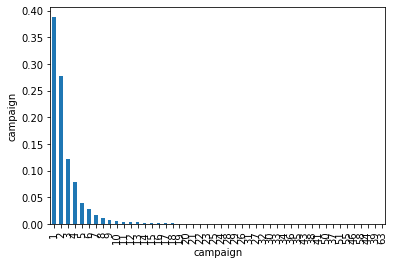

In [10]:
print(pdata['campaign'].value_counts(normalize=True)*100)
print()
pdata['campaign'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel("campaign")
plt.ylabel("campaign")
plt.show()

0      81.736745
1       6.131251
2       4.658158
3       2.525934
4       1.579262
5       1.015240
6       0.612683
7       0.453429
8       0.285329
9       0.203490
10      0.148194
11      0.143770
12      0.097321
13      0.084050
15      0.044237
14      0.042025
17      0.033178
16      0.028754
19      0.024330
23      0.017695
20      0.017695
22      0.013271
18      0.013271
24      0.011059
27      0.011059
29      0.008847
25      0.008847
21      0.008847
30      0.006636
28      0.004424
26      0.004424
37      0.004424
38      0.004424
55      0.002212
40      0.002212
35      0.002212
58      0.002212
51      0.002212
41      0.002212
32      0.002212
275     0.002212
Name: previous, dtype: float64



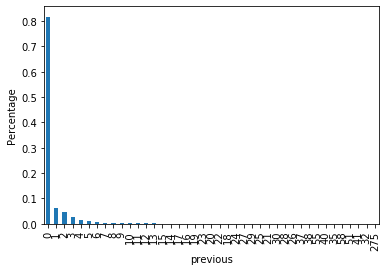

previous,0,1,2,3,4,5,6,7,8,9,...,32,35,37,38,40,41,51,55,58,275
poutcome,,,,,,,,,,,,,,,,,,,,,
failure,0.000000,0.037756,0.030125,0.014598,0.008958,0.005773,0.003229,0.002234,0.001194,0.001084,...,0.000022,0.000022,0.000000,0.000044,0.000000,0.000000,0.000022,0.000022,0.000000,0.000000
other,0.000000,0.013072,0.008626,0.005264,0.003650,0.002367,0.001416,0.001305,0.001017,0.000597,...,0.000000,0.000000,0.000044,0.000000,0.000022,0.000022,0.000000,0.000000,0.000022,0.000022
success,0.000000,0.010462,0.007786,0.005397,0.003185,0.001991,0.001482,0.000973,0.000641,0.000354,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
unknown,0.817367,0.000022,0.000044,0.000000,0.000000,0.000022,0.000000,0.000022,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [11]:
print(pdata['previous'].value_counts(normalize=True)*100)
print()
pdata['previous'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel("previous")
plt.ylabel("Percentage")
plt.show()

pd.crosstab(pdata['poutcome'], pdata['previous'],normalize='all')

-1      81.736745
 182     0.369379
 92      0.325142
 183     0.278693
 91      0.278693
 181     0.258787
 370     0.218973
 184     0.188007
 364     0.170313
 95      0.163677
 350     0.161465
 94      0.159253
 175     0.157041
 185     0.150406
 93      0.143770
 343     0.143770
 188     0.141558
 189     0.132711
 186     0.132711
 174     0.126076
 96      0.126076
 349     0.126076
 363     0.121652
 97      0.119440
 90      0.119440
 196     0.112804
 365     0.112804
 368     0.108381
 342     0.108381
 98      0.108381
          ...    
 774     0.002212
 550     0.002212
 396     0.002212
 492     0.002212
 466     0.002212
 45      0.002212
 434     0.002212
 18      0.002212
 529     0.002212
 465     0.002212
 401     0.002212
 784     0.002212
 656     0.002212
 592     0.002212
 528     0.002212
 464     0.002212
 432     0.002212
 655     0.002212
 495     0.002212
 543     0.002212
 47      0.002212
 782     0.002212
 686     0.002212
 558     0.002212
 526     0

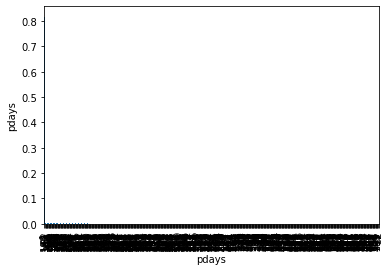

pdays,-1,1,2,3,4,5,6,7,8,9,...,805,808,826,828,831,838,842,850,854,871
poutcome,,,,,,,,,,,,,,,,,,,,,
failure,0.000000,0.000066,0.000022,0.000000,0.000022,0.000022,0.000022,0.000022,0.000044,0.000000,...,0.000000,0.000022,0.000022,0.000022,0.000000,0.000000,0.000022,0.000022,0.000022,0.000022
other,0.000000,0.000066,0.000774,0.000022,0.000000,0.000199,0.000155,0.000111,0.000509,0.000221,...,0.000022,0.000000,0.000000,0.000000,0.000022,0.000022,0.000000,0.000000,0.000000,0.000000
success,0.000000,0.000199,0.000022,0.000000,0.000022,0.000022,0.000044,0.000022,0.000000,0.000044,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
unknown,0.817367,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [12]:
print(pdata['pdays'].value_counts(normalize=True)*100)
print()
pdata['pdays'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel("pdays")
plt.ylabel("pdays")
plt.show()

pd.crosstab(pdata['poutcome'], pdata['pdays'],normalize='all')

unknown    81.747805
failure    10.840282
other       4.069806
success     3.342107
Name: poutcome, dtype: float64



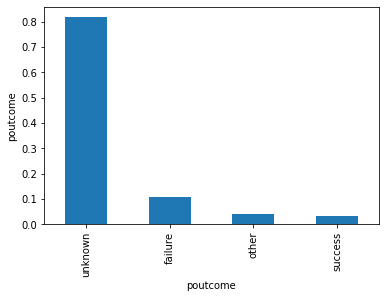

In [13]:
print(pdata['poutcome'].value_counts(normalize=True)*100)
print()
pdata['poutcome'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel("poutcome")
plt.ylabel("poutcome")
plt.show()

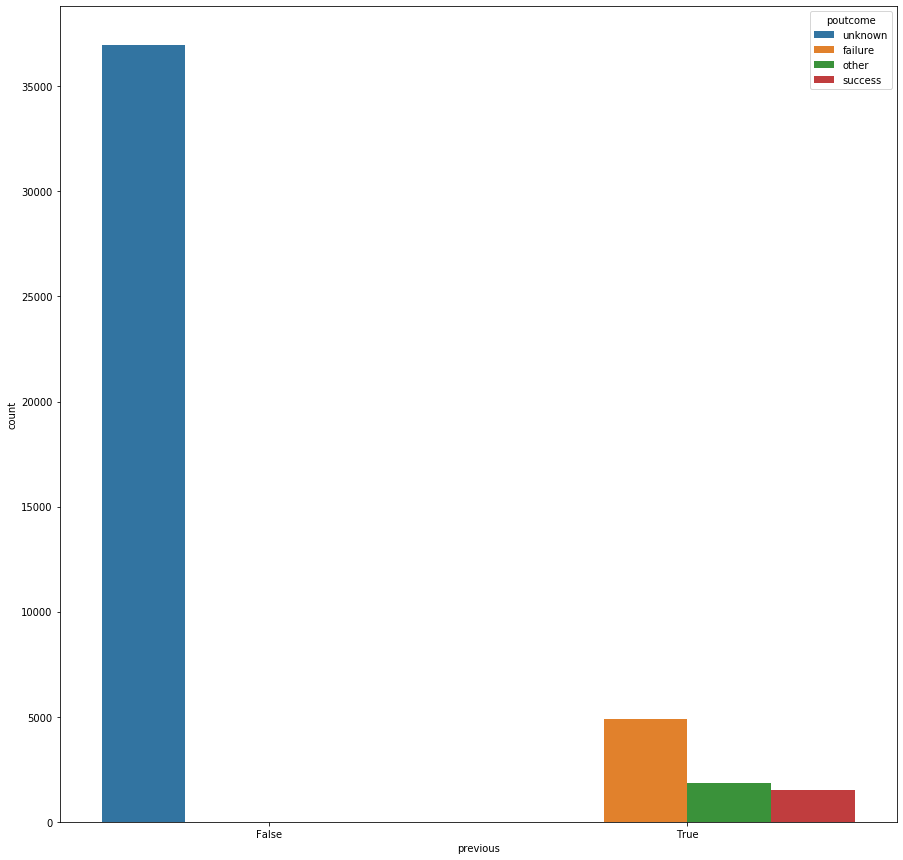

In [14]:
plt.figure(figsize=(15,15))
sns.countplot(pdata['previous'] > 0, hue=pdata['poutcome']);

In [15]:
print(pdata.job.value_counts())
print(pdata.marital.value_counts())
print(pdata.education.value_counts())
print(pdata.default.value_counts())
print(pdata.housing.value_counts())
print(pdata.loan.value_counts())
print(pdata.contact.value_counts())
print(pdata.month.value_counts())
print(pdata.poutcome.value_counts())
print(pdata.Target.value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
no     44396
yes      815
Name: default, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64
n

In [16]:
replaceStruct = {
                "default":   {"no": 0, "yes": 1 } ,
               "housing":   {"no": 0, "yes": 1 } ,
               "loan":   {"no": 0, "yes": 1 } ,
                "Target":     {"no": 0, "yes": 1 } 
                    }


In [17]:
pdata=pdata.replace(replaceStruct)

pdata.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0
5,35,management,married,tertiary,0,231,1,0,unknown,5,may,139,1,-1,0,unknown,0
6,28,management,single,tertiary,0,447,1,1,unknown,5,may,217,1,-1,0,unknown,0
7,42,entrepreneur,divorced,tertiary,1,2,1,0,unknown,5,may,380,1,-1,0,unknown,0
8,58,retired,married,primary,0,121,1,0,unknown,5,may,50,1,-1,0,unknown,0
9,43,technician,single,secondary,0,593,1,0,unknown,5,may,55,1,-1,0,unknown,0


In [18]:
pdata.dtypes

age           int64
job          object
marital      object
education    object
default       int64
balance       int64
housing       int64
loan          int64
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target        int64
dtype: object

In [19]:
pdata.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

In [20]:
pdata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
default,45211.0,0.018027,0.133049,0.0,0.0,0.0,0.0,1.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211.0,0.555838,0.496878,0.0,0.0,1.0,1.0,1.0
loan,45211.0,0.160226,0.366820,0.0,0.0,0.0,0.0,1.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [21]:
pdata.shape

(45211, 17)

## 1b. Strategies to address the different data challenges such as data pollution, outlier’s treatment and missing values treatment.

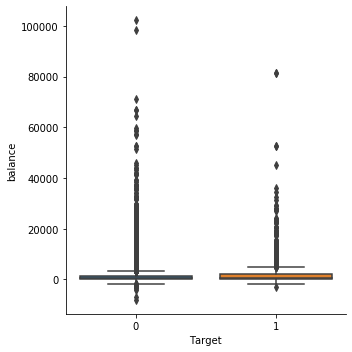

In [22]:
sns.catplot(y="balance", x='Target', kind="box", data=pdata);

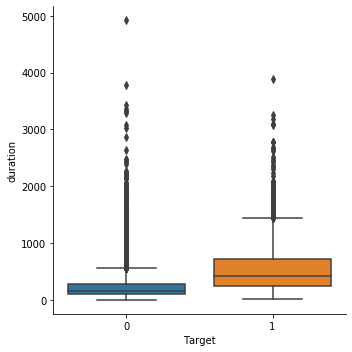

In [23]:
sns.catplot(y="duration", x='Target', kind="box", data=pdata);

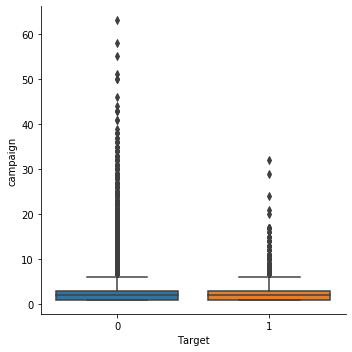

In [24]:
sns.catplot(y="campaign", x='Target', kind="box", data=pdata);

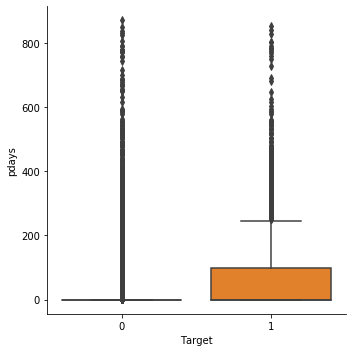

In [25]:
sns.catplot(y="pdays", x='Target', kind="box", data=pdata);

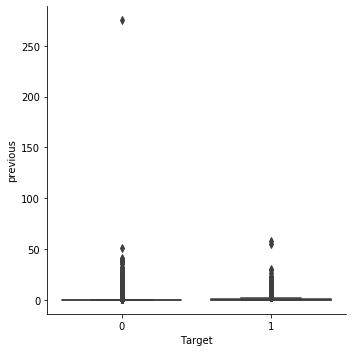

In [26]:
sns.catplot(y="previous", x='Target', kind="box", data=pdata);

## Devlierable 1 - 1c. Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots.

In [27]:
# Categorial Variables with 'Yes' and 'No' Values - converted them into integer 1 and 0. 4 columns were converted. 
#This data type can be used directly in the Logistic, Decision Tree, Random Forest etc...
#"default"
#"housing"
#"loan"
#"Target" 
        
# Continuos variables that have high number of outlier as shown in the box plots. apply standardization to all these fields.
#balance       
#duration      
#campaign  
#age

# 81.7% of outcomes of the previous marketing campaign are "unknow". Will not be able use the data to identify patterns for this campign. Will drop these fields.
#pdays         
#previous      
#poutcome 

# Multi Class Categorical variables will be converted into Category data type and one hot encoded later after futhur analysis.
#job          
#marital      
#education    
#contact      
#day
#month

## Devlierable 1 - 2a. Multivariate analysis (8 marks)
a. Bi-variate analysis between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes.

In [28]:
pd.crosstab(pdata['Target'], pdata['job'],normalize='all')

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
Target,,,,,,,,,,,,
0,0.100418,0.199597,0.030170,0.025016,0.180421,0.038663,0.030789,0.083719,0.014797,0.149455,0.024352,0.005618
1,0.013957,0.015660,0.002721,0.002411,0.028776,0.011413,0.004136,0.008162,0.005950,0.018580,0.004468,0.000752


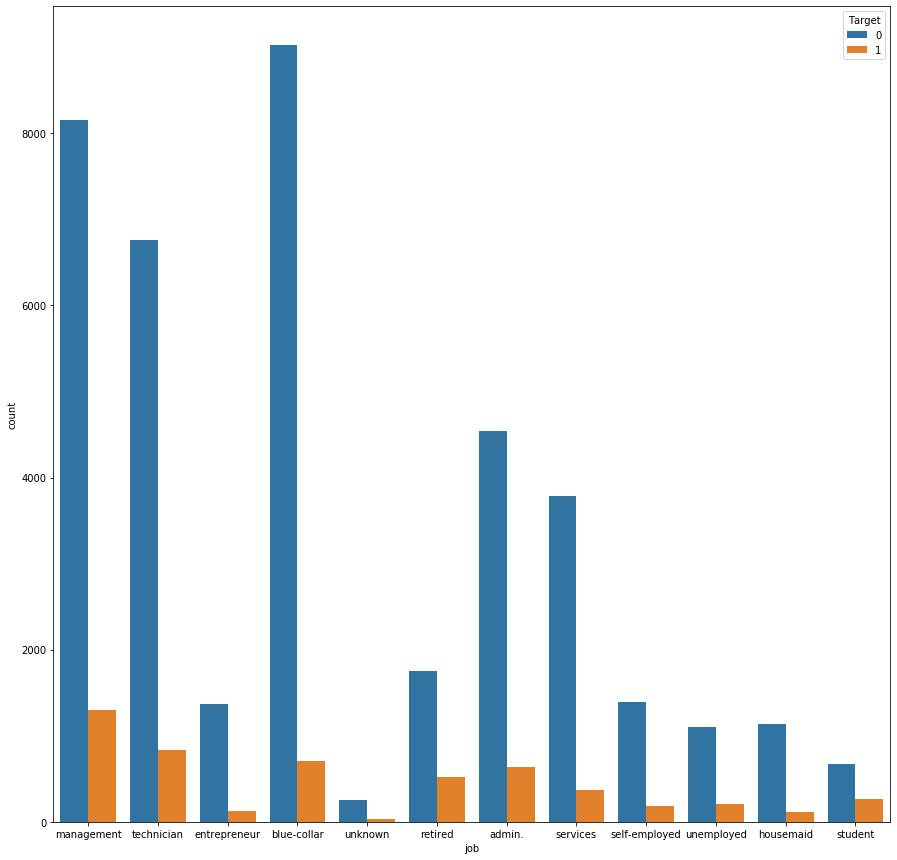

In [29]:
plt.figure(figsize=(15,15))
sns.countplot(pdata['job'], hue=pdata['Target']);

In [30]:
#pdata.groupby(['Target','marital'])['Target','marital'].count()
pd.crosstab(pdata['Target'], pdata['marital'],normalize='all')

marital,divorced,married,single
Target,,,
0,0.101413,0.540997,0.240605
1,0.013758,0.060936,0.042291


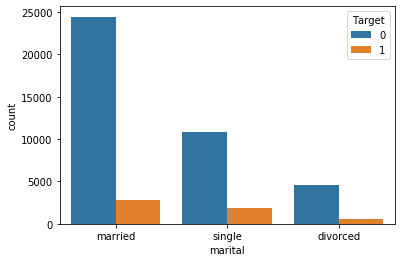

In [31]:
sns.countplot(pdata['marital'], hue=pdata['Target']);

In [32]:
#pdata.groupby(['Target','education'])['education','Target'].count()
pd.crosstab(pdata['Target'], pdata['education'],normalize='all')

education,primary,secondary,tertiary,unknown
Target,,,,
0,0.138462,0.459003,0.250050,0.035500
1,0.013072,0.054190,0.044149,0.005574


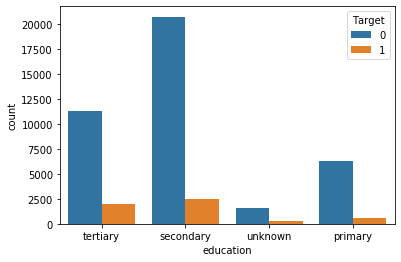

In [33]:
sns.countplot(pdata['education'], hue=pdata['Target']);

In [34]:
#pdata.groupby(['Target','default'])['Target','default'].count()
pd.crosstab(pdata['Target'], pdata['default'],normalize='all')

default,0,1
Target,,
0,0.866139,0.016876
1,0.115835,0.001150


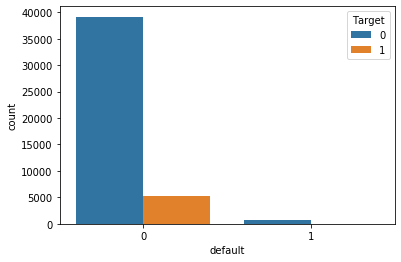

In [35]:
sns.countplot(pdata['default'], hue=pdata['Target']);

In [36]:
#pdata.groupby(['Target','housing'])['Target','housing'].count()
pd.crosstab(pdata['Target'], pdata['housing'],normalize='all')

housing,0,1
Target,,
0,0.369976,0.513039
1,0.074185,0.042799


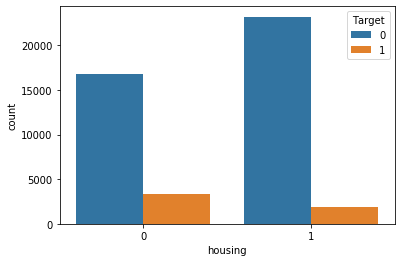

In [37]:
sns.countplot(pdata['housing'], hue=pdata['Target']);

In [38]:
#pdata.groupby(['Target','loan'])['Target','loan'].count()
pd.crosstab(pdata['Target'], pdata['loan'],normalize='all')

loan,0,1
Target,,
0,0.733494,0.149521
1,0.106279,0.010705


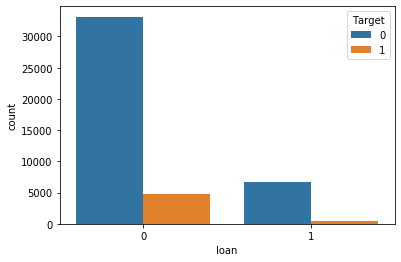

In [39]:
sns.countplot(pdata['loan'], hue=pdata['Target']);

In [40]:
#pdata.groupby(['Target','contact'])['Target','contact'].count()
pd.crosstab(pdata['Target'], pdata['contact'],normalize='all')

contact,cellular,telephone,unknown
Target,,,
0,0.551105,0.055650,0.276260
1,0.096636,0.008626,0.011723


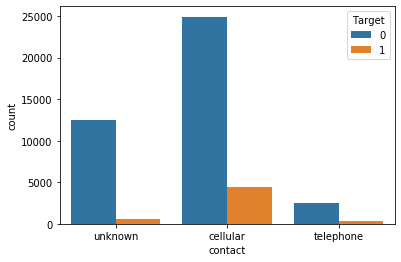

In [41]:
sns.countplot(pdata['contact'], hue=pdata['Target']);

In [42]:
pd.crosstab(pdata['Target'], pdata['month'],normalize='all')

month,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
Target,,,,,,,,,,,,
0,0.052089,0.122957,0.002522,0.048838,0.027891,0.138639,0.106058,0.005065,0.284024,0.078897,0.009179,0.006857
1,0.012762,0.015218,0.002212,0.009754,0.003141,0.013868,0.012077,0.005485,0.020460,0.008914,0.007144,0.005950


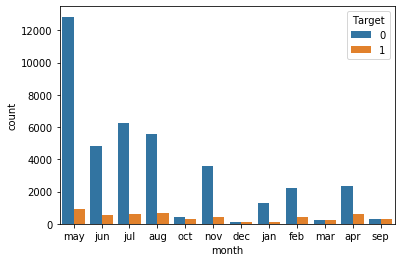

In [43]:
sns.countplot(pdata['month'], hue=pdata['Target']);

In [44]:
pd.crosstab(pdata['Target'], pdata['day'],normalize='all')

day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
Target,,,,,,,,,,,,,,,,,,,,,
0,0.005131,0.024574,0.019929,0.026874,0.037491,0.038730,0.036717,0.036296,0.030568,0.008914,...,0.016611,0.017982,0.008516,0.015638,0.020327,0.021477,0.037314,0.035744,0.028643,0.013205
1,0.001991,0.004026,0.003937,0.005087,0.004755,0.004003,0.003473,0.004446,0.003959,0.002676,...,0.003406,0.002787,0.001371,0.002942,0.002566,0.003318,0.003163,0.002853,0.005994,0.001017


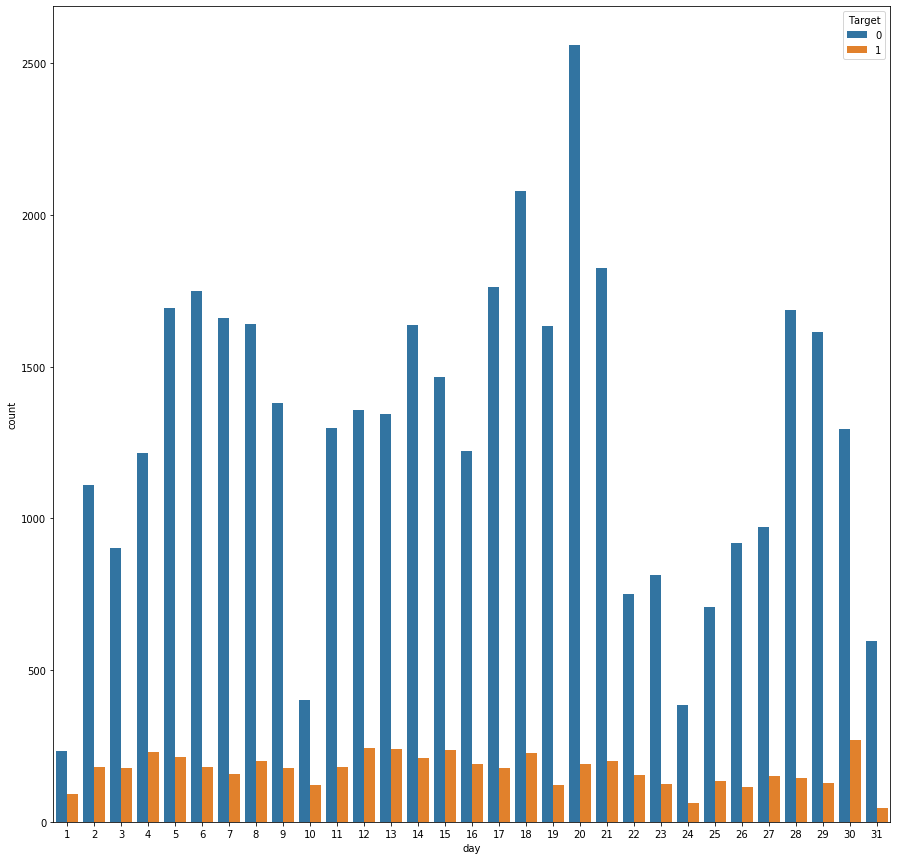

In [45]:
plt.figure(figsize=(15,15))
sns.countplot(pdata['day'], hue=pdata['Target']);

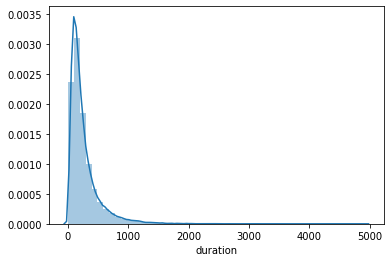

In [46]:
sns.distplot(pdata['duration']);

In [47]:
pd.crosstab(pdata['Target'], pdata['duration'],normalize='all')

duration,0,1,2,3,4,5,6,7,8,9,...,3102,3183,3253,3284,3322,3366,3422,3785,3881,4918
Target,,,,,,,,,,,,,,,,,,,,,
0,0.000066,0.000044,0.000066,0.000088,0.000332,0.000774,0.000995,0.001615,0.001858,0.001703,...,0.000000,0.000000,0.000000,0.000022,0.000022,0.000022,0.000022,0.000022,0.000000,0.000022
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000022,0.000000,...,0.000022,0.000022,0.000022,0.000000,0.000000,0.000000,0.000000,0.000000,0.000022,0.000000


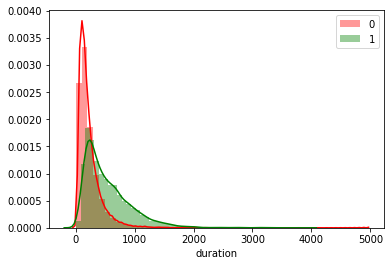

In [48]:
#plt.figure(figsize=(15,15))
sns.distplot(pdata[pdata['Target']==0]['duration'],color='r',label=0)
sns.distplot(pdata[pdata['Target']==1]['duration'],color='g',label=1)
plt.legend()
plt.show()

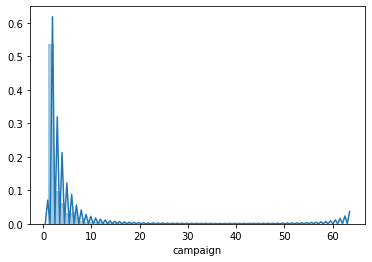

In [49]:
sns.distplot(pdata['campaign']);

In [50]:
pd.crosstab(pdata['Target'], pdata['campaign'],normalize='all')

campaign,1,2,3,4,5,6,7,8,9,10,...,39,41,43,44,46,50,51,55,58,63
Target,,,,,,,,,,,,,,,,,,,,,
0,0.331402,0.245604,0.108447,0.070890,0.035943,0.026520,0.015218,0.011236,0.006768,0.005574,...,0.000022,0.000044,0.000066,0.000022,0.000022,0.000044,0.000022,0.000022,0.000022,0.000022
1,0.056646,0.030988,0.013669,0.007012,0.003074,0.002035,0.001040,0.000708,0.000464,0.000310,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


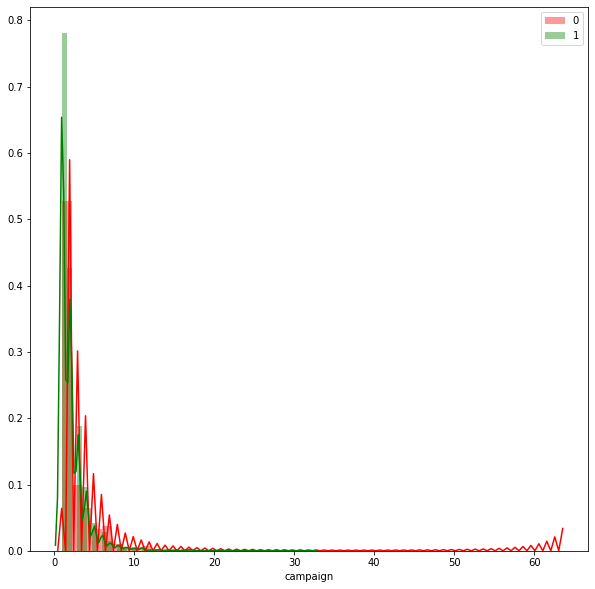

In [51]:
plt.figure(figsize=(10,10))
sns.distplot(pdata[pdata['Target']==0]['campaign'],color='r',label=0)
sns.distplot(pdata[pdata['Target']==1]['campaign'],color='g',label=1)
plt.legend()
plt.show()

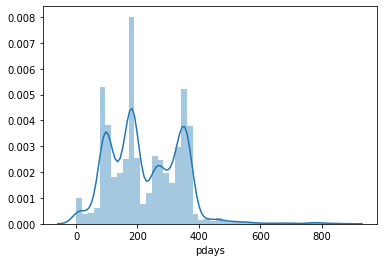

In [52]:
NonZeroPdays = pdata.loc[pdata["pdays"] > 0, "pdays"]
sns.distplot(NonZeroPdays)

In [53]:
pd.crosstab(pdata['Target'], pdata['pdays'],normalize='all')

pdays,-1,1,2,3,4,5,6,7,8,9,...,805,808,826,828,831,838,842,850,854,871
Target,,,,,,,,,,,,,,,,,,,,,
0,0.742518,0.000199,0.000774,0.000022,0.000022,0.000243,0.000199,0.000155,0.000553,0.000199,...,0.000000,0.000022,0.000022,0.000000,0.000022,0.000022,0.000000,0.000022,0.000000,0.000022
1,0.074849,0.000133,0.000044,0.000000,0.000022,0.000000,0.000022,0.000000,0.000000,0.000066,...,0.000022,0.000000,0.000000,0.000022,0.000000,0.000000,0.000022,0.000000,0.000022,0.000000


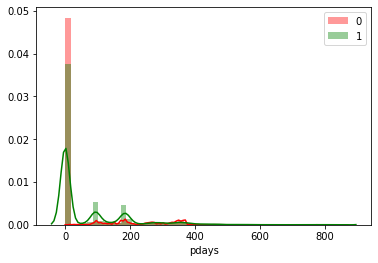

In [54]:
sns.distplot(pdata[pdata['Target']==0]['pdays'],color='r',label=0)
sns.distplot(pdata[pdata['Target']==1]['pdays'],color='g',label=1)
plt.legend()
plt.show()

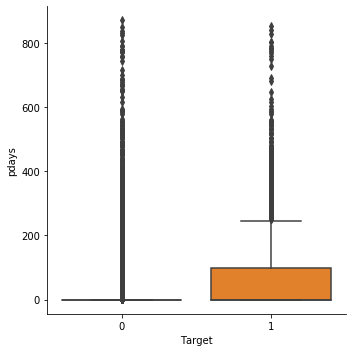

In [55]:
sns.catplot(y="pdays", x='Target', kind="box", data=pdata);

In [56]:
pd.crosstab(pdata['Target'], pdata['previous'],normalize='all')

previous,0,1,2,3,4,5,6,7,8,9,...,32,35,37,38,40,41,51,55,58,275
Target,,,,,,,,,,,,,,,,,,,,,
0,0.742518,0.048417,0.036496,0.018756,0.012010,0.007476,0.004291,0.003340,0.001991,0.001504,...,0.000022,0.000022,0.000044,0.000044,0.000022,0.000022,0.000022,0.000000,0.000000,0.000022
1,0.074849,0.012895,0.010086,0.006503,0.003782,0.002676,0.001836,0.001194,0.000863,0.000531,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000022,0.000022,0.000000


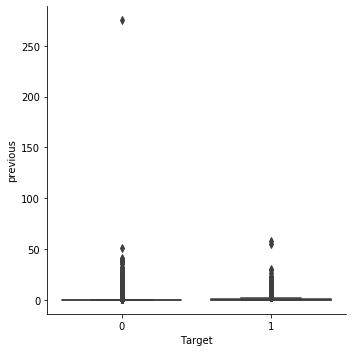

In [57]:
sns.catplot(y="previous", x='Target', kind="box", data=pdata);

In [58]:
#pdata.groupby(['Target','poutcome'])['Target','poutcome'].count()
pd.crosstab(pdata['Target'], pdata['poutcome'],normalize='all')

poutcome,failure,other,success,unknown
Target,,,,
0,0.094734,0.033908,0.011789,0.742585
1,0.013669,0.006790,0.021632,0.074893


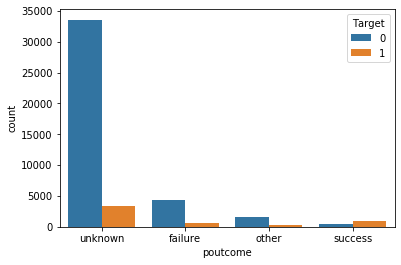

In [59]:
sns.countplot(pdata['poutcome'], hue=pdata['Target']);

/Users/apramani/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/apramani/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


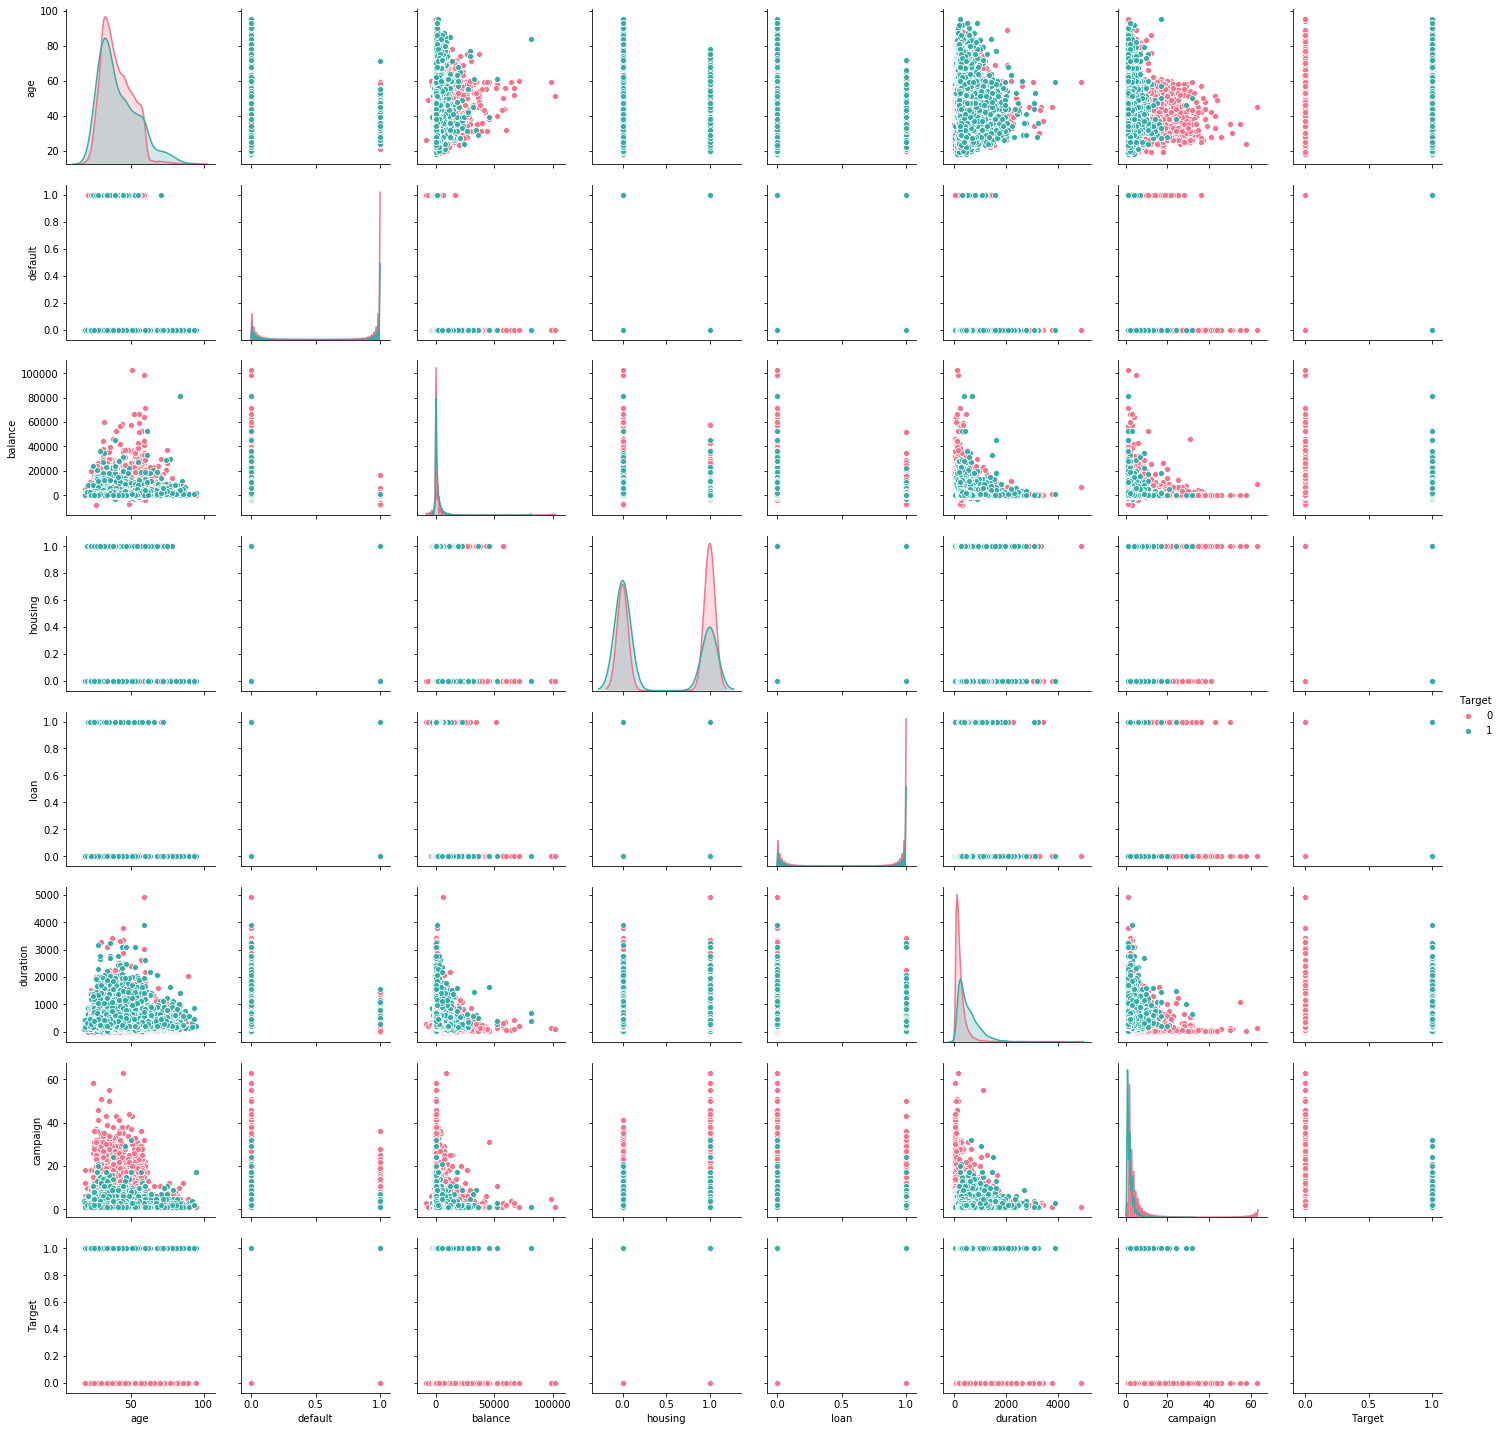

In [60]:
#sns.pairplot(pdata,diag_kind='kde')
#sns.pairplot(pdata[['age','default','balance','housing','loan','duration','campaign','Target']])
sns.pairplot(pdata[['age','default','balance','housing','loan','duration','campaign','Target']], hue="Target", palette="husl")

In [61]:
pdata[['age','default','balance','housing','loan','duration','day','campaign','Target']].corr() # It will show correlation matrix 

,age,default,balance,housing,loan,duration,day,campaign,Target
age,1.000000,-0.017879,0.097783,-0.185513,-0.015655,-0.004648,-0.009120,0.004760,0.025155
default,-0.017879,1.000000,-0.066745,-0.006025,0.077234,-0.010021,0.009424,0.016822,-0.022419
balance,0.097783,-0.066745,1.000000,-0.068768,-0.084350,0.021560,0.004503,-0.014578,0.052838
housing,-0.185513,-0.006025,-0.068768,1.000000,0.041323,0.005075,-0.027982,-0.023599,-0.139173
loan,-0.015655,0.077234,-0.084350,0.041323,1.000000,-0.012412,0.011370,0.009980,-0.068185
duration,-0.004648,-0.010021,0.021560,0.005075,-0.012412,1.000000,-0.030206,-0.084570,0.394521
day,-0.009120,0.009424,0.004503,-0.027982,0.011370,-0.030206,1.000000,0.162490,-0.028348
campaign,0.004760,0.016822,-0.014578,-0.023599,0.009980,-0.084570,0.162490,1.000000,-0.073172
Target,0.025155,-0.022419,0.052838,-0.139173,-0.068185,0.394521,-0.028348,-0.073172,1.000000


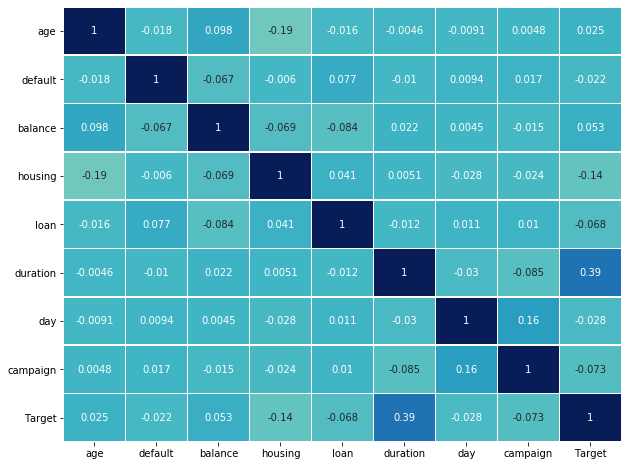

In [62]:
plt.figure(figsize=(10,8))

sns.heatmap(pdata[['age','default','balance','housing','loan','duration','day','campaign','Target']].corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show()

## Devlierable 1 - 2b. Multivariate analysis (8 marks)
b. Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots

In [63]:
## 81.7% of outcomes of the previous marketing campaign are "unknow". Will not be able use the data to identify patterns for this campign. Will drop these fields.
#pdays         
#previous      
#poutcome 

#Duration, Age, Balance, Campaign has the strogest correlation to the Target. If the client subscribed a term deposit. (Yes, No)

#day: last contact day of the month has very LOW coorelation with the Target so dropping it.

## Deliverable – 2 (Prepare the data for analytics) – (10)
2.1. Ensure the attribute types are correct. If not, take appropriate actions. <br>
2.2. Get the data model ready.<br>
2.3. Transform the data i.e. scale / normalize if required<br>
2.4. Create the training set and test set in ratio of 70:30<br>

In [64]:
pdata.drop(['poutcome'], axis=1, inplace=True)
pdata.drop(['previous'], axis=1, inplace=True)
pdata.drop(['pdays'], axis=1, inplace=True)
pdata.drop(['day'], axis=1, inplace=True)

In [65]:
#pdata = pd.read_csv("bank-full.csv")
from sklearn.preprocessing import StandardScaler

pdata_sclaed_fields = pdata[["age","balance","duration","campaign"]]

scaler = StandardScaler()
scaled_pdata = scaler.fit_transform(pdata_sclaed_fields)
scaled_pdata = pd.DataFrame(scaled_pdata, columns=pdata_sclaed_fields.columns)

scaled_pdata.shape
pdata.drop(["age","balance","duration","campaign"],axis=1,inplace=True)

pdata = pd.merge(pdata,scaled_pdata, left_index=True, right_index=True)

In [66]:
pdata_sclaed_fields.head()

,age,balance,duration,campaign
0,58,2143,261,1
1,44,29,151,1
2,33,2,76,1
3,47,1506,92,1
4,33,1,198,1


In [67]:
pdata.head()

,job,marital,education,default,housing,loan,contact,month,Target,age,balance,duration,campaign
0,management,married,tertiary,0,1,0,unknown,may,0,1.606965,0.256419,0.011016,-0.569351
1,technician,single,secondary,0,1,0,unknown,may,0,0.288529,-0.437895,-0.416127,-0.569351
2,entrepreneur,married,secondary,0,1,1,unknown,may,0,-0.747384,-0.446762,-0.707361,-0.569351
3,blue-collar,married,unknown,0,1,0,unknown,may,0,0.571051,0.047205,-0.645231,-0.569351
4,unknown,single,unknown,0,0,0,unknown,may,0,-0.747384,-0.447091,-0.233620,-0.569351


In [68]:
pdata['job'] = pdata['job'].astype('category')
pdata['marital'] = pdata['marital'].astype('category')
pdata['education'] = pdata['education'].astype('category')
pdata['contact'] = pdata['contact'].astype('category')
pdata['month'] = pdata['month'].astype('category')

oneHotCols=["job","marital","education","contact","month"]

pdata=pd.get_dummies(pdata, columns=oneHotCols, drop_first=True)

In [69]:
pdata.dtypes

default                  int64
housing                  int64
loan                     int64
Target                   int64
age                    float64
balance                float64
duration               float64
campaign               float64
job_blue-collar          uint8
job_entrepreneur         uint8
job_housemaid            uint8
job_management           uint8
job_retired              uint8
job_self-employed        uint8
job_services             uint8
job_student              uint8
job_technician           uint8
job_unemployed           uint8
job_unknown              uint8
marital_married          uint8
marital_single           uint8
education_secondary      uint8
education_tertiary       uint8
education_unknown        uint8
contact_telephone        uint8
contact_unknown          uint8
month_aug                uint8
month_dec                uint8
month_feb                uint8
month_jan                uint8
month_jul                uint8
month_jun                uint8
month_ma

In [70]:
from sklearn.model_selection import train_test_split

X = pdata.drop('Target',axis=1)     # Predictor feature columns
Y = pdata['Target']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

#x_train.dtypes

Lets check split of data

In [71]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(pdata.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(pdata.index)) * 100))

70.00% data is in training set
30.00% data is in test set


Now lets check True/False ratio in split data 

In [72]:
print("Original PL True Values    : {0} ({1:0.2f}%)".format(len(pdata.loc[pdata['Target'] == 1]), (len(pdata.loc[pdata['Target'] == 1])/len(pdata.index)) * 100))
print("Original PL False Values   : {0} ({1:0.2f}%)".format(len(pdata.loc[pdata['Target'] == 0]), (len(pdata.loc[pdata['Target'] == 0])/len(pdata.index)) * 100))
print("")
print("Training PL True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training PL False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test PL True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test PL False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original PL True Values    : 5289 (11.70%)
Original PL False Values   : 39922 (88.30%)

Training PL True Values    : 3738 (11.81%)
Training PL False Values   : 27909 (88.19%)

Test PL True Values        : 1551 (11.43%)
Test PL False Values       : 12013 (88.57%)



# Deliverable – 3 (create the ensemble model) – (30)

First create models using Logistic Regression and Decision Tree algorithm. Note the model performance by using different matrices. Use confusion matrix to evaluate class level metrics i.e. Precision/Recall. Also reflect the accuracy and F1 score of the model. (10 marks)

# Model1. ## Build Logistic Regression Model

In [73]:
## importing necessary metrics to evaluate model performance
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score

from sklearn.linear_model import LogisticRegression   # importing logistic regression from scikit learn

model = LogisticRegression(random_state=7)  #assigning a variable for the algorithm

print(model.get_params());

# Running a loop to check different values of 'solver'
# all solver can be used with l2, only 'liblinear' and 'saga' works with both 'l1' and 'l2'

train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=7,penalty='l2', solver=i)  # changing values of solver
    model.fit(x_train, y_train) 
    y_predict = model.predict(x_test)     
    train_score.append(round(model.score(x_train,y_train),3))
    test_score.append(round(model.score(x_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'warn', 'n_jobs': None, 'penalty': 'l2', 'random_state': 7, 'solver': 'warn', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.896, 0.896, 0.896, 0.896, 0.896]

[0.894, 0.894, 0.894, 0.894, 0.894]


/Users/apramani/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [74]:
train_score=[]
test_score=[]
solver = ['liblinear','saga']  # changing values of solver which works with 'l1'
for i in solver:
    model = LogisticRegression(random_state=7,penalty='l1', solver=i)  # changed value of penaly to 'l1'
    model.fit(x_train, y_train) 
    y_predict = model.predict(x_test)     
    train_score.append(round(model.score(x_train,y_train),3))
    test_score.append(round(model.score(x_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['liblinear', 'saga']

[0.896, 0.896]

[0.894, 0.894]


/Users/apramani/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [75]:
model = LogisticRegression(random_state=7,penalty='l1',solver='liblinear',class_weight='balanced') # changing class weight to balanced

model.fit(x_train, y_train) 

y_predict = model.predict(x_test)     

print("Trainig accuracy",model.score(x_train,y_train))  
print()
print("Testing accuracy",model.score(x_test, y_test))   

Trainig accuracy 0.8287673397162448

Testing accuracy 0.8258625774107933


In [76]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.8287673397162448

Testing accuracy 0.8258625774107933

Confusion Matrix


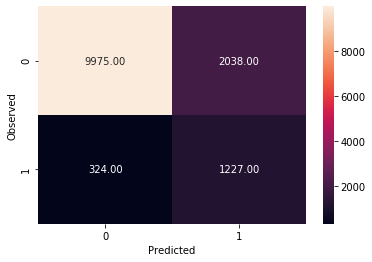

None

Recall: 0.7911025145067698

Precision: 0.37580398162327716

F1 Score: 0.5095514950166112

Roc Auc Score: 0.8107264840909776


,name,Trainig_accuracy,Testing_accuracy,recall_score,precision_score,f1_score,roc_auc_score
0,Linear Reg,0.828767,0.825863,0.791103,0.375804,0.509551,0.810726


In [77]:

print("Trainig accuracy",model.score(x_train,y_train))  
print()
print("Testing accuracy",model.score(x_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

dict = {'name': ["Linear Reg"], 
        'Trainig_accuracy': [model.score(x_train,y_train)], 
        'Testing_accuracy': [model.score(x_test, y_test)],
        'recall_score': [recall_score(y_test,y_predict)],
        'precision_score': [precision_score(y_test,y_predict)],
        'f1_score': [f1_score(y_test,y_predict)],
        'roc_auc_score': [roc_auc_score(y_test,y_predict)]
       } 
model_results = pd.DataFrame(data=dict)
model_results.head()

# Model2. ## Build Decision Tree Model

In [78]:
from sklearn.tree import DecisionTreeClassifier
#dt_model = DecisionTreeClassifier(criterion = 'entropy' )
#dt_model.fit(x_train, train_labels)
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [79]:
print(dTree.score(x_train, y_train))
print(dTree.score(x_test, y_test))
print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = x_train.columns))#Print the feature importance of the decision model

1.0
0.8585962842819227
                          Imp
default              0.001599
housing              0.024841
loan                 0.009593
age                  0.145038
balance              0.161277
duration             0.326517
campaign             0.042437
job_blue-collar      0.009521
job_entrepreneur     0.003798
job_housemaid        0.002774
job_management       0.015043
job_retired          0.003907
job_self-employed    0.005053
job_services         0.008913
job_student          0.006601
job_technician       0.011732
job_unemployed       0.005841
job_unknown          0.001719
marital_married      0.017222
marital_single       0.010235
education_secondary  0.013642
education_tertiary   0.013498
education_unknown    0.008050
contact_telephone    0.006536
contact_unknown      0.021301
month_aug            0.010041
month_dec            0.004144
month_feb            0.011423
month_jan            0.009056
month_jul            0.011096
month_jun            0.015029
month_mar        

Trainig accuracy 0.8914589060574462

Testing accuracy 0.8896343261574756

Confusion Matrix


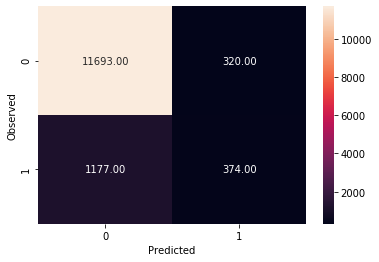

None

Recall: 0.24113475177304963

Precision: 0.5389048991354467

F1 Score: 0.333184855233853

Roc Auc Score: 0.6072484713664216


,name,Trainig_accuracy,Testing_accuracy,recall_score,precision_score,f1_score,roc_auc_score
0,Linear Reg,0.828767,0.825863,0.791103,0.375804,0.509551,0.810726
0,Decision Tree,0.891459,0.889634,0.241135,0.538905,0.333185,0.607248


In [80]:
# Tune the model

dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, random_state=7)
dTreeR.fit(x_train, y_train)
y_predict = dTreeR.predict(x_test) 
print("Trainig accuracy",dTreeR.score(x_train,y_train))  
print()
print("Testing accuracy",dTreeR.score(x_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

dict = {'name': ["Decision Tree"], 
        'Trainig_accuracy': [dTreeR.score(x_train,y_train)], 
        'Testing_accuracy': [dTreeR.score(x_test, y_test)],
        'recall_score': [recall_score(y_test,y_predict)],
        'precision_score': [precision_score(y_test,y_predict)],
        'f1_score': [f1_score(y_test,y_predict)],
        'roc_auc_score': [roc_auc_score(y_test,y_predict)]
       } 

tempResultsDf = pd.DataFrame(data=dict)
model_results = pd.concat([model_results, tempResultsDf])
model_results.head()

# Model3. ## Build Random Forest Model

/Users/apramani/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Trainig accuracy 0.7638006762094354

Testing accuracy 0.7557505160719552

Confusion Matrix


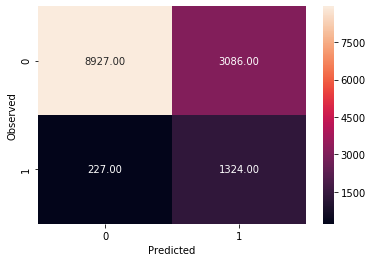

None

Recall: 0.8536428110896196

Precision: 0.3002267573696145

F1 Score: 0.4442207683274618

Roc Auc Score: 0.7983772200790644


,name,Trainig_accuracy,Testing_accuracy,recall_score,precision_score,f1_score,roc_auc_score
0,Linear Reg,0.828767,0.825863,0.791103,0.375804,0.509551,0.810726
0,Decision Tree,0.891459,0.889634,0.241135,0.538905,0.333185,0.607248
0,Random Forest,0.763801,0.755751,0.853643,0.300227,0.444221,0.798377


In [81]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(criterion = 'entropy', class_weight={0:.13,1:1}, max_depth = 5, min_samples_leaf=5)
# poor performance (n_estimators = 50,random_state=12)
rfcl = rfcl.fit(x_train, y_train)
y_predict = rfcl.predict(x_test) 
print("Trainig accuracy",rfcl.score(x_train,y_train))  
print()
print("Testing accuracy",rfcl.score(x_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))


dict = {'name': ["Random Forest"], 
        'Trainig_accuracy': [rfcl.score(x_train,y_train)], 
        'Testing_accuracy': [rfcl.score(x_test, y_test)],
        'recall_score': [recall_score(y_test,y_predict)],
        'precision_score': [precision_score(y_test,y_predict)],
        'f1_score': [f1_score(y_test,y_predict)],
        'roc_auc_score': [roc_auc_score(y_test,y_predict)]
       } 

tempResultsDf = pd.DataFrame(data=dict)
model_results = pd.concat([model_results, tempResultsDf])
model_results.head()

# Model4. ## Build Bagging Model

Trainig accuracy 0.9995892185673207

Testing accuracy 0.8963432615747567

Confusion Matrix


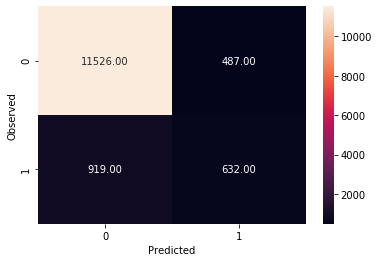

None

Recall: 0.4074790457769181

Precision: 0.5647899910634495

F1 Score: 0.4734082397003745

Roc Auc Score: 0.6834698150719271


,name,Trainig_accuracy,Testing_accuracy,recall_score,precision_score,f1_score,roc_auc_score
0,Linear Reg,0.828767,0.825863,0.791103,0.375804,0.509551,0.810726
0,Decision Tree,0.891459,0.889634,0.241135,0.538905,0.333185,0.607248
0,Random Forest,0.763801,0.755751,0.853643,0.300227,0.444221,0.798377
0,Bagging,0.999589,0.896343,0.407479,0.564790,0.473408,0.683470


In [82]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
# best performance bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(x_train, y_train)
y_predict = bgcl.predict(x_test) 
print("Trainig accuracy",bgcl.score(x_train,y_train))  
print()
print("Testing accuracy",bgcl.score(x_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

dict = {'name': ["Bagging"], 
        'Trainig_accuracy': [bgcl.score(x_train,y_train)], 
        'Testing_accuracy': [bgcl.score(x_test, y_test)],
        'recall_score': [recall_score(y_test,y_predict)],
        'precision_score': [precision_score(y_test,y_predict)],
        'f1_score': [f1_score(y_test,y_predict)],
        'roc_auc_score': [roc_auc_score(y_test,y_predict)]
       } 

tempResultsDf = pd.DataFrame(data=dict)
model_results = pd.concat([model_results, tempResultsDf])
model_results.head()

# Model5. ## Build Ada Boost Model

Trainig accuracy 0.8934812146490979

Testing accuracy 0.893320554408729

Confusion Matrix


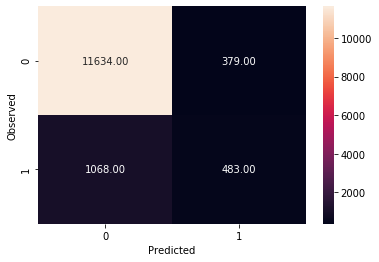

None

Recall: 0.3114119922630561

Precision: 0.5603248259860789

F1 Score: 0.4003315375051803

Roc Auc Score: 0.6399314185905307


,name,Trainig_accuracy,Testing_accuracy,recall_score,precision_score,f1_score,roc_auc_score
0,Linear Reg,0.828767,0.825863,0.791103,0.375804,0.509551,0.810726
0,Decision Tree,0.891459,0.889634,0.241135,0.538905,0.333185,0.607248
0,Random Forest,0.763801,0.755751,0.853643,0.300227,0.444221,0.798377
0,Bagging,0.999589,0.896343,0.407479,0.564790,0.473408,0.683470
0,AdaBoost,0.893481,0.893321,0.311412,0.560325,0.400332,0.639931


In [83]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=40, random_state=1)
# best performance n_estimators=40, random_state=1
# (poor performance) n_estimators=50,random_state=1
# (poor performance) n_estimators = 100, learning_rate=0.1, random_state=22 
abcl = abcl.fit(x_train, y_train)

y_predict = abcl.predict(x_test) 
print("Trainig accuracy",abcl.score(x_train,y_train))  
print()
print("Testing accuracy",abcl.score(x_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

dict = {'name': ["AdaBoost"], 
        'Trainig_accuracy': [abcl.score(x_train,y_train)], 
        'Testing_accuracy': [abcl.score(x_test, y_test)],
        'recall_score': [recall_score(y_test,y_predict)],
        'precision_score': [precision_score(y_test,y_predict)],
        'f1_score': [f1_score(y_test,y_predict)],
        'roc_auc_score': [roc_auc_score(y_test,y_predict)]
       } 

tempResultsDf = pd.DataFrame(data=dict)
model_results = pd.concat([model_results, tempResultsDf])
model_results.head()

# Model6. ## Build Gradient Boost Model

Trainig accuracy 0.904888299048883

Testing accuracy 0.8961958124447066

Confusion Matrix


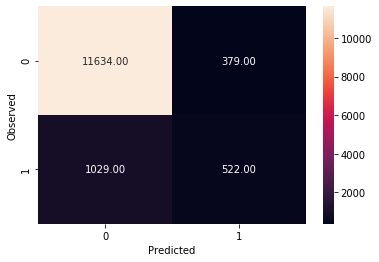

None

Recall: 0.3365570599613153

Precision: 0.5793562708102109

F1 Score: 0.4257748776508973

Roc Auc Score: 0.6525039524396604


,name,Trainig_accuracy,Testing_accuracy,recall_score,precision_score,f1_score,roc_auc_score
0,Linear Reg,0.828767,0.825863,0.791103,0.375804,0.509551,0.810726
0,Decision Tree,0.891459,0.889634,0.241135,0.538905,0.333185,0.607248
0,Random Forest,0.763801,0.755751,0.853643,0.300227,0.444221,0.798377
0,Bagging,0.999589,0.896343,0.407479,0.564790,0.473408,0.683470
0,AdaBoost,0.893481,0.893321,0.311412,0.560325,0.400332,0.639931


In [84]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,learning_rate = 0.1, max_depth=4,random_state=22)
#Best Model Performance n_estimators = 50,learning_rate = 0.1, max_depth=4,random_state=22
gbcl = gbcl.fit(x_train, y_train)

y_predict = gbcl.predict(x_test) 
print("Trainig accuracy",gbcl.score(x_train,y_train))  
print()
print("Testing accuracy",gbcl.score(x_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

dict = {'name': ["Gradient Boost"], 
        'Trainig_accuracy': [gbcl.score(x_train,y_train)], 
        'Testing_accuracy': [gbcl.score(x_test, y_test)],
        'recall_score': [recall_score(y_test,y_predict)],
        'precision_score': [precision_score(y_test,y_predict)],
        'f1_score': [f1_score(y_test,y_predict)],
        'roc_auc_score': [roc_auc_score(y_test,y_predict)]
       } 

tempResultsDf = pd.DataFrame(data=dict)
model_results = pd.concat([model_results, tempResultsDf])
model_results.head()

In [85]:
model_results.head()

,name,Trainig_accuracy,Testing_accuracy,recall_score,precision_score,f1_score,roc_auc_score
0,Linear Reg,0.828767,0.825863,0.791103,0.375804,0.509551,0.810726
0,Decision Tree,0.891459,0.889634,0.241135,0.538905,0.333185,0.607248
0,Random Forest,0.763801,0.755751,0.853643,0.300227,0.444221,0.798377
0,Bagging,0.999589,0.896343,0.407479,0.564790,0.473408,0.683470
0,AdaBoost,0.893481,0.893321,0.311412,0.560325,0.400332,0.639931


In [86]:
# Conclusion - The marketing team is looking for a higher hit ratio.
# Based on the business requirement the marketing team wants to identify potential 
# customers who are relatively more likely to subscribe term deposit and 
# thus increase their hit ratio.

# The Hit ratio is more important and there is no mention about the cost related to 
# campaign for False Positives. So a lower Precision should be OK.

# The model should produce a lower False Negative. We dont want to miss out on potential
# customers who might otherwise by missed due to a higher False Negative.
# So Recall is of the highest importance. 

# The Random Forest Model has the highest RECALL and is the best model.